# Regularization

Before we start the concept of regularization we need to understand the concept of Under Fit, Correct Fit and Over fit

    -> Underfitting: A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data.
    -> Overfitting: A statistical model is said to be overfitted, when we train it with a lot of data
    -> Good Fit/Correct Fit: The case when the model makes the predictions with 0 error, is said to have a good fit on the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

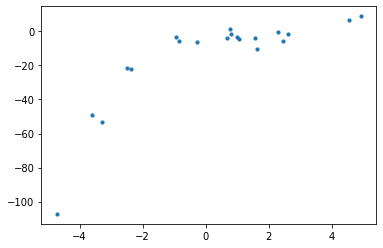

In [3]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
# The data generated looks like
plt.scatter(x,y, s=10)
plt.show()

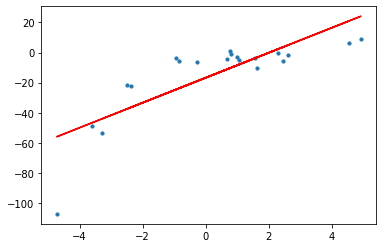

In [4]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
# Let’s apply a linear regression model to this dataset.
model = LinearRegression()
model.fit(x, y)
y_lr = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_lr, color='r')
plt.show()

In [5]:
# We can see that the straight line is unable to capture the patterns in the data. 
# This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:
print ("MSE : ", mean_squared_error(y, y_lr))
print("R2: ", r2_score(y, y_lr))

MSE :  253.07217948430372
R2:  0.6386750054827146


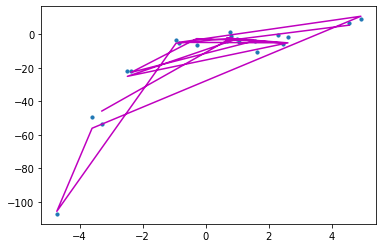

In [6]:
# To convert the original features into their higher order terms we will use the PolynomialFeatures 
# class provided by scikit-learn. Next, we train the model using Linear Regression.
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly3_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly3_pred, color='m')
plt.show()

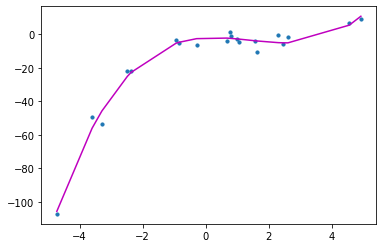

In [7]:
# To the polynomial line proper we need to sort the data
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly3_pred), key=sort_axis)
x, y_poly3_pred = zip(*sorted_zip)
plt.plot(x, y_poly3_pred, color='m')
plt.show()

In [8]:
# It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. 
# Computing the RMSE and R²-score of the quadratic plot gives:
print("MSE=", mean_squared_error(y,y_poly3_pred))
print("R2=", r2_score(y,y_poly3_pred))

MSE= 801.7621935070515
R2= -0.14471974265772625


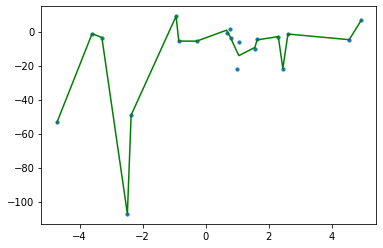

In [9]:
polynomial_features20= PolynomialFeatures(degree=20,include_bias=False)
x_poly20 = polynomial_features20.fit_transform(x)

model = LinearRegression()
model.fit(x_poly20, y)
y_poly20_pred = model.predict(x_poly20)

# To the polynomial line proper we need to sort the data
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly20_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly20_pred, color='g')
plt.show()

In [11]:
print("MSE=", mean_squared_error(y,y_poly20_pred))
print("R2=", r2_score(y,y_poly20_pred))

MSE= 9.248420625164142
R2= 0.986795523954903


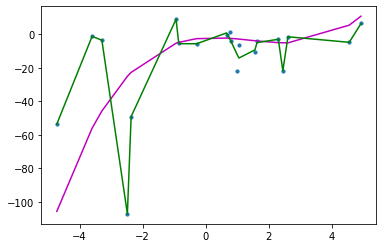

In [10]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly3_pred, color='m')
plt.plot(x, y_poly20_pred, color='g')
plt.show()

#### How to avoid Overfitting:
The commonly used methodologies are:

    Cross- Validation: A standard way to find out-of-sample prediction error is to use 5-fold cross validation.
    Early Stopping: Its rules provide us the guidance as to how many iterations can be run before learner begins to over-fit.
    Pruning: Pruning is extensively used while building related models. It simply removes the nodes which add little predictive power for the problem in hand.
    Regularization: It introduces a cost term for bringing in more features with the objective function. Hence it tries to push the coefficients for many variables to zero and hence reduce cost term.


#### Regularization
This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.